# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
# Import numpy and pandas

import numpy as np
import pandas as pd
import datetime

from matplotlib import pyplot as plt

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from dateutil.relativedelta import relativedelta


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [4]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [5]:
# Your code here:
sensor.head(3)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:

sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [7]:
# Your code here:

num_rows, num_columns = sensor.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1751
Number of columns: 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [24]:
# Your code here:

date_range = pd.date_range("1/1/2018 00:00:00 ", "1/1/2018 00:29:10", periods = num_rows)

Assign the time series index to the dataframe's index.

In [25]:
# Your code here:

sensor.index = date_range
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [26]:
infer = pd.infer_freq(sensor.index)
infer

'S'

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

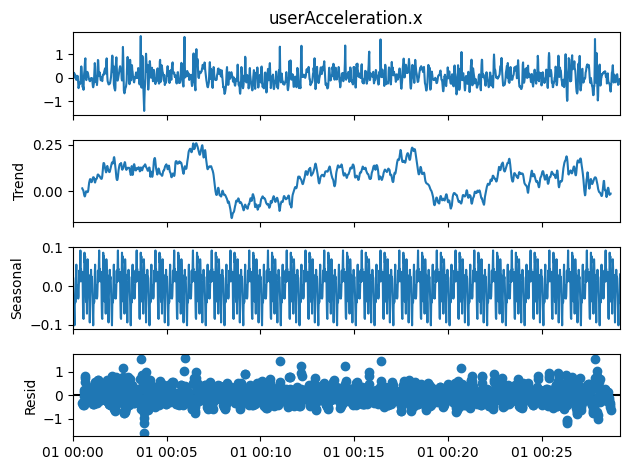

In [27]:
# Your code here:

descomposed = seasonal_decompose(sensor['userAcceleration.x'], period=60)
descomposed.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

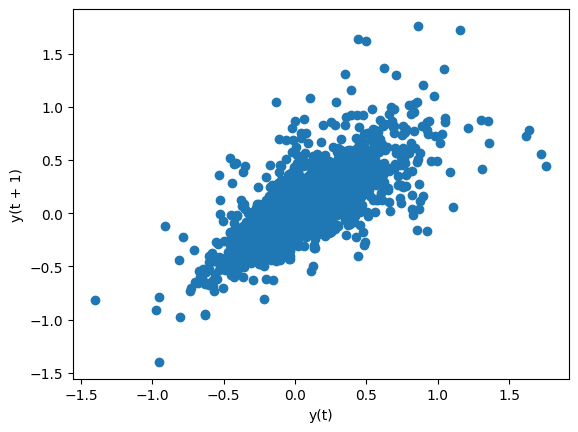

In [28]:
# Your code here:
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1);


Create a lag plot for `rotationRate.x`

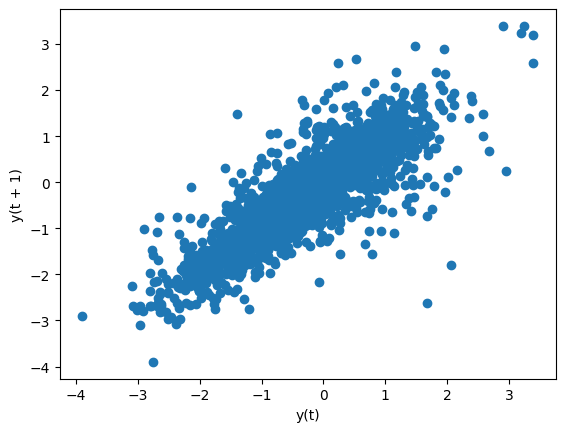

In [29]:
# Your code here:
pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1);


What are your conclusions from both visualizations?

In [30]:
# Your conclusions here:

"""The data points of 'userAcceleration.x - lag' are more scattered than the ones of 'rotationRate.x - lag'. 
This means that there is more correlation of rotationRate.x than the correlation of userAcceleration.x. 
Therefore, the difference between the actual value and the lag is higher in 'userAcceleration.x'. """

"The data points of 'userAcceleration.x - lag' are more scattered than the ones of 'rotationRate.x - lag'. \nThis means that there is more correlation of rotationRate.x than the correlation of userAcceleration.x. \nTherefore, the difference between the actual value and the lag is higher in 'userAcceleration.x'. "

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [31]:
# Your code here:

from statsmodels.tsa.stattools import adfuller
res_1 = adfuller(sensor["userAcceleration.x"])
res_1
p_value_2 = res_1[1]
p_value_2

2.823439483037483e-30

In [34]:
res_2 = adfuller(sensor["rotationRate.x"])
res_2
p_value_2 = res_2[1]
p_value_2

6.320230335912299e-06

What are your conclusions from this test?

In [33]:
# Your conclusions here:

"""Both variables have a p_value lower than 0.05. It means that both reject the null hypothesis. 
# Both are stationary series, they do not change over time."""

'Both variables have a p_value lower than 0.05. It means that both reject the null hypothesis. \n# Both are stationary series, they do not change over time.'

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [41]:
order = (2, 0, 1)

In [42]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [46]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

arima_model = ARIMA(y_train, order=order, freq="S")


/Users/mairagutierrez/miniconda3/envs/ironhack/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


In [39]:
# 2. Fit the model:

arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 373.401
Date:                Tue, 12 Dec 2023   AIC                           -736.803
Time:                        13:01:25   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.016      3.994      0.000       0.032       0.095
ar.L1          0.9882      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.000      -0.443      -0.315
ma.L1          0.1824      0.039      4.643      0.000       0.105       0.259
sigma2         0.0381      0.001     46.070      0.000       0.036       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1776.70
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.34
Prob(H) (two-sided):                  0.60   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# 3. Predict: create y_pred:
y_pred = arima_result.predict(start=len(y_train), end=len(y_train)+10)

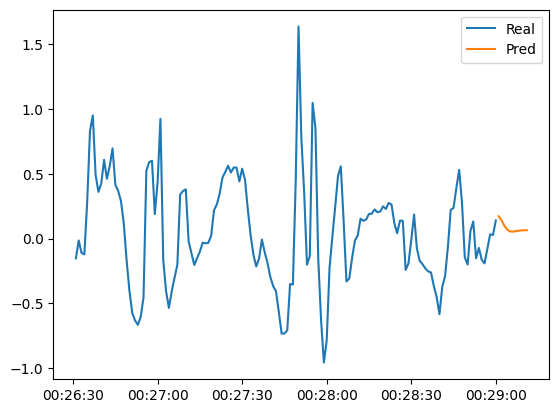

In [48]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [49]:
# Your code here:
from statsmodels.tools.eval_measures import rmse
# rmse(y_pred, y_test)
rmse_ = rmse(y_pred, y_test)
rmse_

0.2085023469618697